# Creational Patterns

The creational patterns are guidelines suggested to create objects. They provide different mechanisms to create objects in a way that code is flexible, resusable, and easy to maintain.

The five creational patterns available are:
1. Builder
2. Factory
3. Abstract Factory
4. Prototype
5. Singleton

Each of those previous patterns are unique, and can be used in different situations and conditions.

# Prototype

**What is a prototype?**

A prototype is suitable when is needed to create copies of the same object quickly. It allows to have different objects to execute different actions, but all have the same attributes.

**Analogy**

You have a parent cell, you want to have two child cells with the same properties as the parent cell. How can you do this? You can apply the miosis, this is a biological process where the reproduction produces with child cells identically as the parent cell. Something similar happens here, but it is oriented to create a bunch of similar objects during coding.

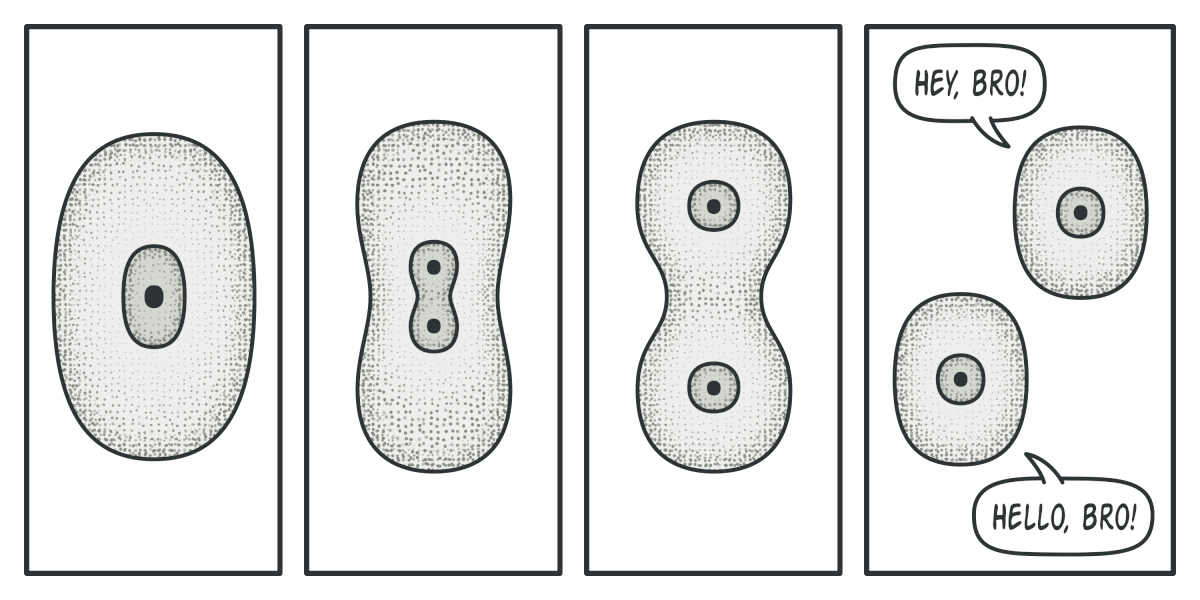

Reference: https://refactoring.guru/design-patterns/prototype

**When should we use it?**

The prototype is suitable when creating an object from scratch is too expensive. It allows to have identical copies for different purposes. 

In addition, it make sense to have similar copies when working under the most optimized configurations. 

**Scenario**

We need to create a neural network and try different optimizers and loss functions.

*(The training here will be ignored, this is not the main purpose of this).*

## Antipattern

In this case, I am going to create the base object class

In [17]:
import torch.nn as nn
from copy import deepcopy

In [5]:
class NaiveNN(nn.Module):
    def __init__(self, input_dim: int = 16, output_dim: int = 16):
        super(NaiveNN, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.SiLU(),
            nn.Linear(512, output_dim),
        )

    def forward(self, x):
        return self.seq(x)

To define different object classes, we can define like one by one.

In [6]:
model1 = NaiveNN()

In [7]:
model2 = NaiveNN()

In [8]:
model3 = NaiveNN()

It might seem that model1, model2, and model3 are the same object. However, if we make a comparison of the weights, that is not completely true.

In [15]:
model1.seq[0].weight == model2.seq[0].weight

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [16]:
model1.seq[0].weight == model3.seq[0].weight

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In order to avoid doing this kind of mistake, we can use a prototype. This will warranty that we have created the same kind of object.

## Pattern

In [19]:
class ModelPrototype:
    def __init__(self, model_instance):
        self.model_instance = model_instance

    def get_new_model(self):
        return deepcopy(self.model_instance)

In [20]:
prototype = ModelPrototype(model_instance=NaiveNN())

In [21]:
model1 = prototype.get_new_model()

In [22]:
model2 = prototype.get_new_model()

In [23]:
model3 = prototype.get_new_model()

Now, we can verify the model weights

In [24]:
model1.seq[0].weight == model2.seq[0].weight

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [25]:
model2.seq[0].weight == model3.seq[0].weight

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

As you seen before, this can be useful when we want to create the same object several times. In addition, it should be stated that it can be also used when creating new objects from scratch it is too expensive.